<a href="https://colab.research.google.com/github/sonalsrivas/Non-Dimensional-Load-Q-Analysis/blob/main/CALCULATION_RS_2_P_RandomForest_7Dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Random Forest algorithm** is a kind of bootstrapping ensemble learning where not one but many machine learning models are used to arrive at a more accurate model.


*A FANTASTIC INTRO HERE - https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f*

Ensemble Learning-> Boosting and Bootstraping



In [103]:
import os
from google.colab import drive
#drive.mount('/content/gdrive')
#print(os.listdir(r'/content/gdrive/My Drive'))
drive.mount('/content/gdrive')
print(os.listdir(r'/content/gdrive/My Drive/Colab Notebooks'))


# Importing the libraries
import numpy as np
import pandas as pd

#Importing Data
data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Copy of CALCULATION-RS-2-P.xlsx")

#### CAN BE CHANGED
data1.columns = ['Displacement in Z-direction per Unit Thickness','Poissons ratio','Non-dimensional shear modulus, GR^2/D', 'Non-dimensional upper foundation modulus, cR^4/D','Non-dimensional lower foundation modulus, kR^4/D','Geometric parameter, R^2/Roh','Non-dimensional load, qR^4/Dh']


Mounted at /content/gdrive
['Conversion Word Problems.ipynb', 'General.ipynb', 'Numeral Unit Separation.ipynb', 'ConversionWordProblemsMP.ipynb', 'Untitled', 'Untitled0.ipynb', 'NumeralUnitSeparationMP.ipynb', 'main.ipynb', 'Copy of main.ipynb', 'Word Number.ipynb', 'Corrected Main2.ipynb', 'type of series Program.ipynb', 'Up and Running Main.ipynb', 'TwitterSentiment_AV_test_tweets_anuFYb8.csv', 'TwitterSentiment_AV_train_E6oV3lV.csv', 'Untitled1.ipynb', 'TwitterSentimentAnalysiswithTFIDF.ipynb', 'Tetris Project.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'codechef july challenge 2020 practice.ipynb', 'Garvit Solution.ipynb', 'Untitled4.ipynb', 'introqcqh-lab-1.zip', 'lab-1.ipynb', 'Untitled5.ipynb', 'Sept2020 Codechef Long.ipynb', 'DATA-RS-1-BLANK.gsheet', 'DATA-RS-1-BLANK - Table.csv', 'DATA-RS-1-BLANK - Table.gsheet', 'Dad ANN.xlsx', 'ANN classification Dads Data.ipynb', 'ANN labelled-weak.ipynb', '  -Copy of Random Forest -Copy of ANN labelled-weak.ipynb', 'Concrete_Data.xls', '

In [104]:
data1.fillna(0)
print("Number of rows    :",data1.shape[0])
print("Number of columns :",data1.shape[1])
#for colname in data1.columns:
#  for val in data1[colname]:
#    if type(val) != (float):
#      print(colname, type(val))
#  print(f"checked {colname}")

Number of rows    : 580
Number of columns : 7


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parameters of train_test_split
**test_size**: to specify the percentage of data instances taken as test divided by 100; default is 0.25

**random_state**: an integer explicitely passed here would lead to you having a reproducible splitting of the dataset; not specifying this argument would lead to it being set to np.random.RandomState which is a mersenne twister.


In [107]:
dataSet=data1
#Splitting train and test data
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
train,test = train_test_split(dataSet, test_size = 0.3, random_state = 123)
train_X = train[[x for x in train.columns if x not in ["Non-dimensional load, qR^4/Dh"]]]
train_Y = train["Non-dimensional load, qR^4/Dh"]
test_X  = test[[x for x in test.columns if x not in ["Non-dimensional load, qR^4/Dh"]]]
test_Y  = test["Non-dimensional load, qR^4/Dh"]

## Libraries for plot graph presentation

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

**Mean Squared Error (MSE)** : the mean squared difference between the estimated values and the actual value.

**R square score** : the proportion of the variance in the dependent variable that is predictable from the independent variable.

**What is a good r2 score?**
It depends on your research work but more then 50%, R2 value with low RMES value is acceptable to scientific research community, Results with low R2 value of 25% to 30% are valid because it represent your findings.

--------------------------------------------

**RandomForestRegressor Parameter**

n_estimator : specifies the number of decision trees in the random forest; default value is 100.

--------------------------------------------

**plt.figure Parameter**

figsize: specify widh and height in inches




In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
model.fit(train_X,train_Y)

predict_train_Y= model.predict(train_X)
r2score=("%.2f" % r2_score(train_Y,predict_train_Y))
rms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))
print("train error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

predict_test_Y= model.predict(test_X)
r2score=("%.2f" % r2_score(test_Y,predict_test_Y))
rms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))
print("test error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

print("comparision b/w predicted value and actual test value ")


train error:
R2	: 1.00 
RMS	: 62.553955494488456 

test error:
R2	: 0.99 
RMS	: 111.61265683424212 

comparision b/w predicted value and actual test value 


Comparision between Predicted value and Actual test value 


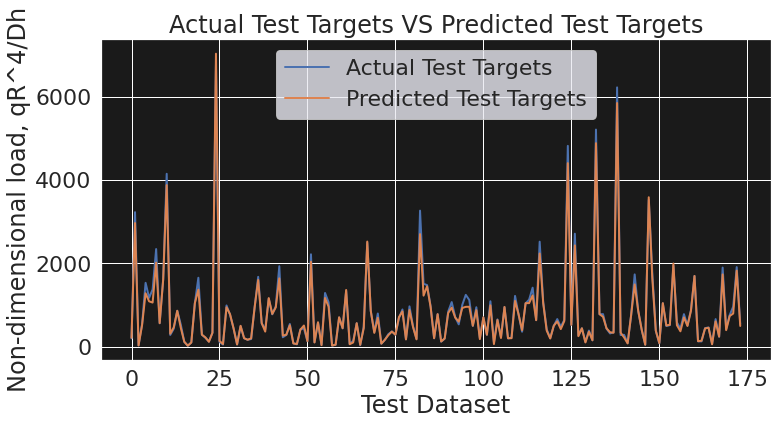

In [110]:

print("Comparision between Predicted value and Actual test value ")

plt.figure(figsize=(13,28))
plt.subplot(211)
prediction = pd.DataFrame(predict_test_Y)  
testy = test_Y.reset_index()["Non-dimensional load, qR^4/Dh"]
   
ax = testy.plot(label="Actual Test Targets",figsize=(12,13),linewidth=2)
ax = prediction[0].plot(label = "Predicted Test Targets",figsize=(12,13),linewidth=2)

plt.legend(loc="best")
plt.title("Actual Test Targets VS Predicted Test Targets")
plt.xlabel("Test Dataset")
plt.ylabel("Non-dimensional load, qR^4/Dh")
ax.set_facecolor("k")

In [111]:
#train_X =pd.DataFrame(train_X)
#test_X =pd.DataFrame(test_X)

#train_Y =pd.DataFrame(train_Y)
#test_Y =pd.DataFrame(test_Y)

pred_train_Y =pd.DataFrame(predict_train_Y)
pred_test_Y = pd.DataFrame(predict_test_Y)


XX=pd.concat([train_X,test_X],ignore_index=True)
YY=pd.concat([train_Y,test_Y],ignore_index=True)
RR=pd.concat([pred_train_Y,pred_test_Y],ignore_index=True)

XX.columns = ['Displacement in Z-direction per Unit Thicknession per Unit Thickness','Poissons ratio','Non-dimensional shear modulus, GR^2/D', 'Non-dimensional upper foundation modulus, cR^4/D','Non-dimensional lower foundation modulus, kR^4/D','Geometric parameter, R^2/Roh']

XX['Non-dimensional load, qR^4/Dh']=YY
XX['Predicted_Q']=RR

XX.to_csv("prediction_results_Q_RF.csv")

In [112]:
predicted_data1=pd.read_csv("/content/prediction_results_Q_RF.csv")

Text(0.5, 0, 'Experimental_Result')

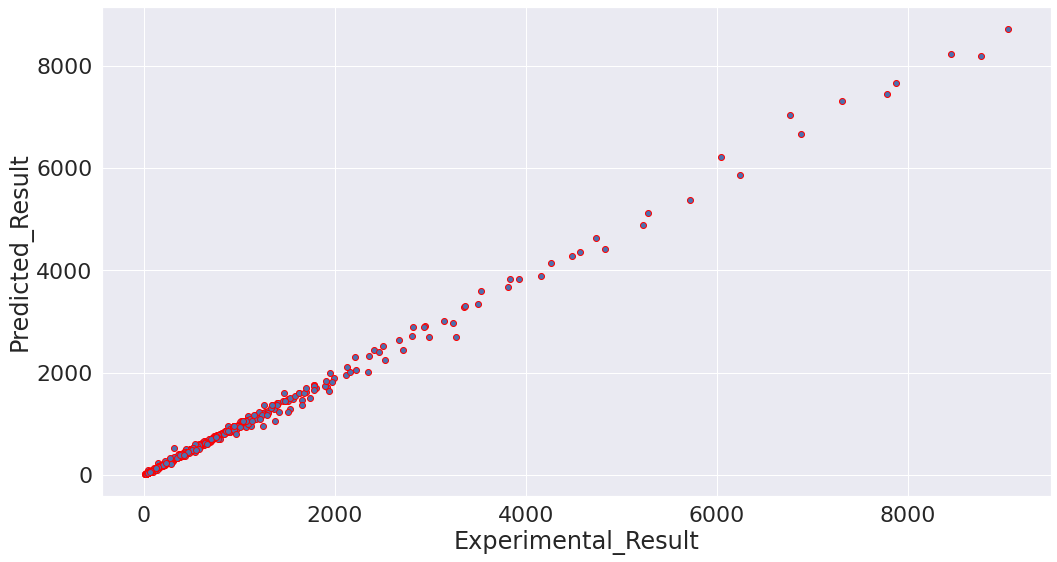

In [113]:
# scatter plot of Q Experimented and RFPredicted
plt.figure(figsize=[17,9])
plt.scatter(y='Predicted_Q',x='Non-dimensional load, qR^4/Dh',edgecolors='red',data=predicted_data1)
plt.ylabel('Predicted_Result')
plt.xlabel('Experimental_Result')


###**Identify outliers in data**


In [114]:
print("Number of rows    :",predicted_data1.shape[0])
print("Number of columns :",predicted_data1.shape[1])

Number of rows    : 580
Number of columns : 9


In [115]:
predicted_data1.head

<bound method NDFrame.head of      Unnamed: 0  ...  Predicted_Q
0             0  ...   780.776773
1             1  ...   142.017040
2             2  ...   770.751641
3             3  ...  1029.739365
4             4  ...   151.629944
..          ...  ...          ...
575         575  ...   394.852379
576         576  ...   736.459697
577         577  ...   794.485633
578         578  ...  1827.738963
579         579  ...   495.927198

[580 rows x 9 columns]>

In [116]:
predicted_data1=predicted_data1.drop(columns='Predicted_Q')

# ====================== DIAGRAMS ==========================


https://seaborn.pydata.org/generated/seaborn.pairplot.html

Maybe show this to Dad, so that he may assess.


Use argument:-> var to select specific rows&cols for pairplot.

Text(0.5, 0, 'Non-dimensional shear modulus, GR^2/D')

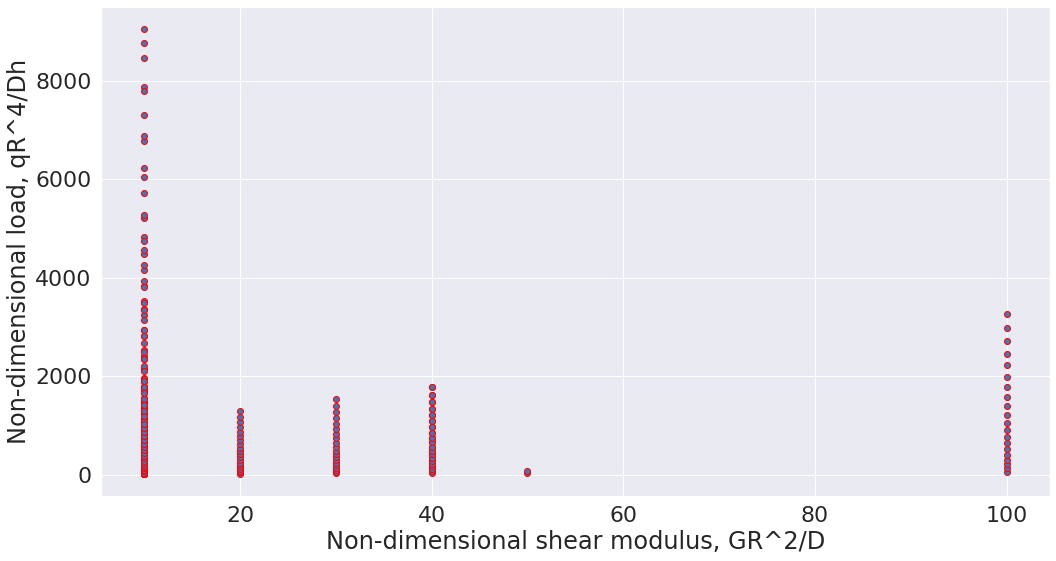

In [117]:
# scatter plot
plt.figure(figsize=[17,9])
plt.scatter(y='Non-dimensional load, qR^4/Dh',x='Non-dimensional shear modulus, GR^2/D',edgecolors='red',data=dataSet)
plt.ylabel('Non-dimensional load, qR^4/Dh')
plt.xlabel('Non-dimensional shear modulus, GR^2/D')

Text(0.5, 0, 'Non-dimensional lower foundation modulus, kR^4/D')

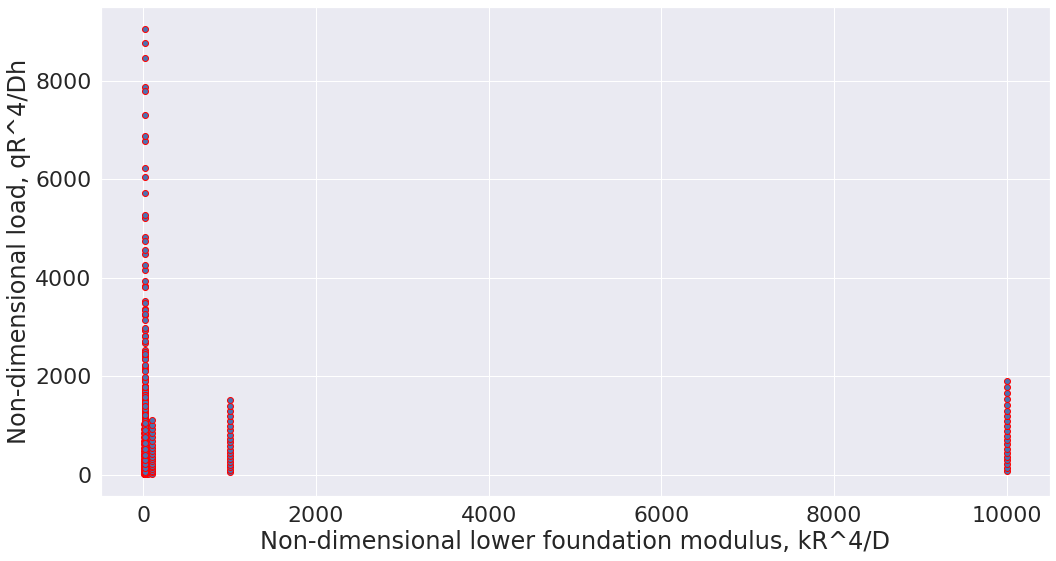

In [118]:
# scatter plot of Concrete Strength and Water quantity
plt.figure(figsize=[17,9])
plt.scatter(y='Non-dimensional load, qR^4/Dh',x='Non-dimensional lower foundation modulus, kR^4/D',edgecolors='red',data=dataSet)
plt.ylabel('Non-dimensional load, qR^4/Dh')
plt.xlabel('Non-dimensional lower foundation modulus, kR^4/D')


This scatter plot is same as the plot in the last row, 4th column in the pairplt matrix

"The below diagonal matrix is above DM with reversed axis."

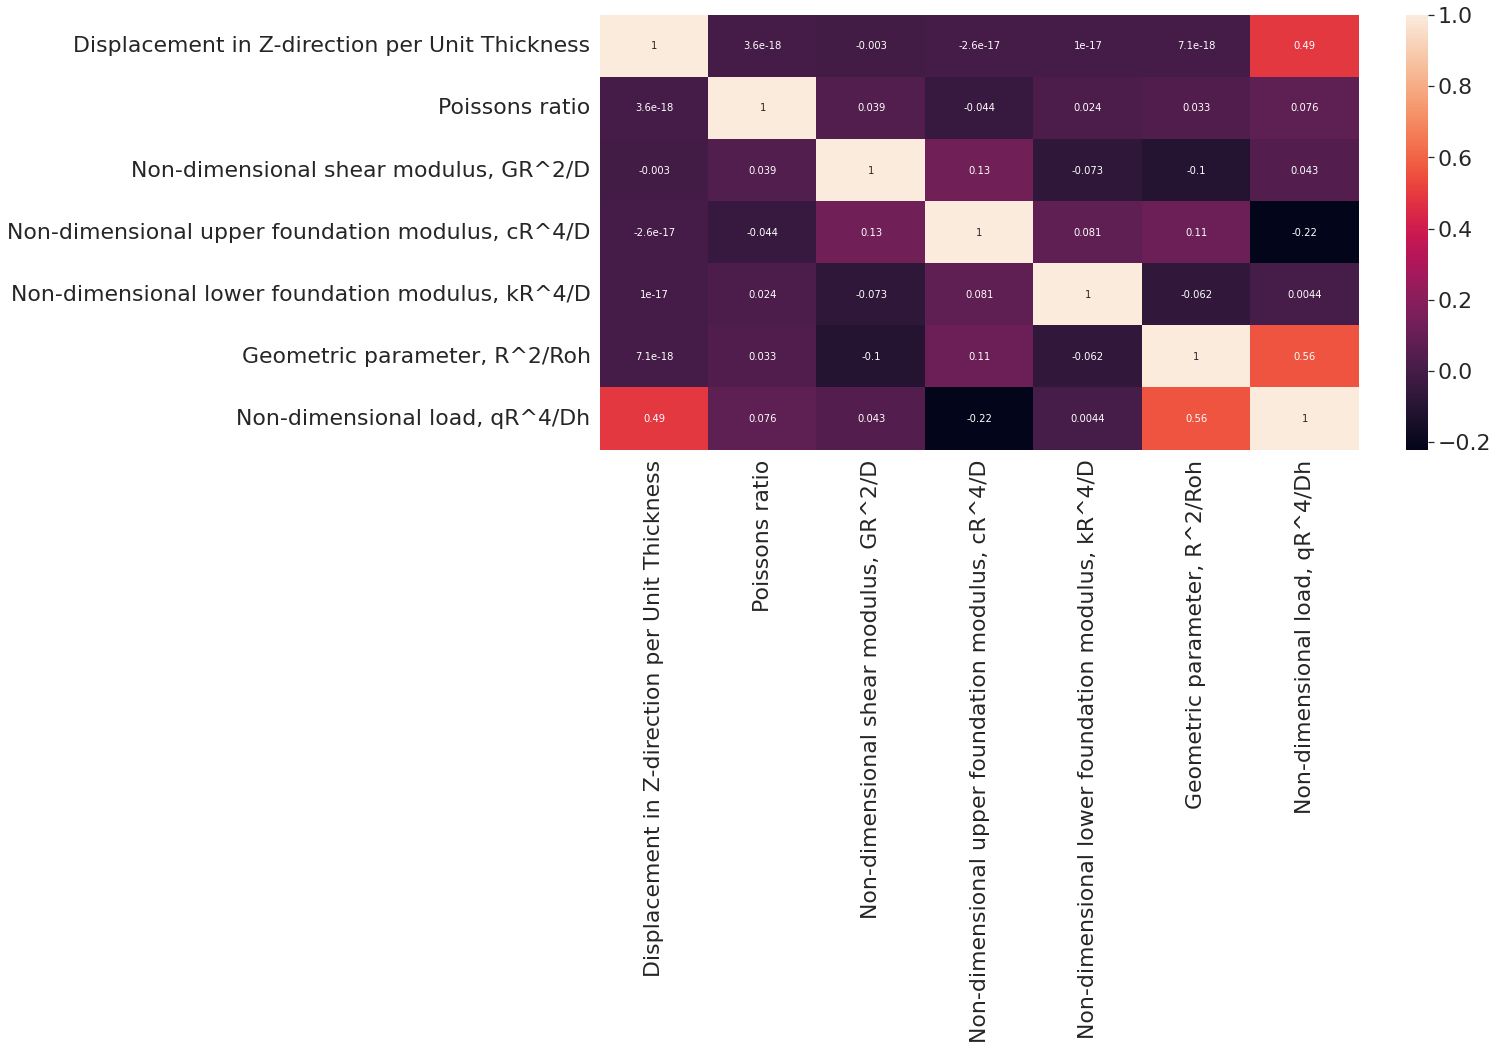

In [119]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sns.heatmap(dataSet.corr(),annot=True)

The above numeric figures in the heatmap are correlation coefficent 

https://www.analyticsvidhya.com/blog/2021/01/beginners-guide-to-pearsons-correlation-coefficient/

https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7

Pearson's Correlation Coefficient - measure of the strength and direction of a linear correlation between two variables.

The value ranges [-1,+1] ; -1 means there is a negative correlation bewten the 2 variables(ie. the increase of one, leads to decrease of teh other) and 0 means no correlation and +1 means there is a positive correlation.

CHANGE color scheme with argument: cmap="YlGnBu"

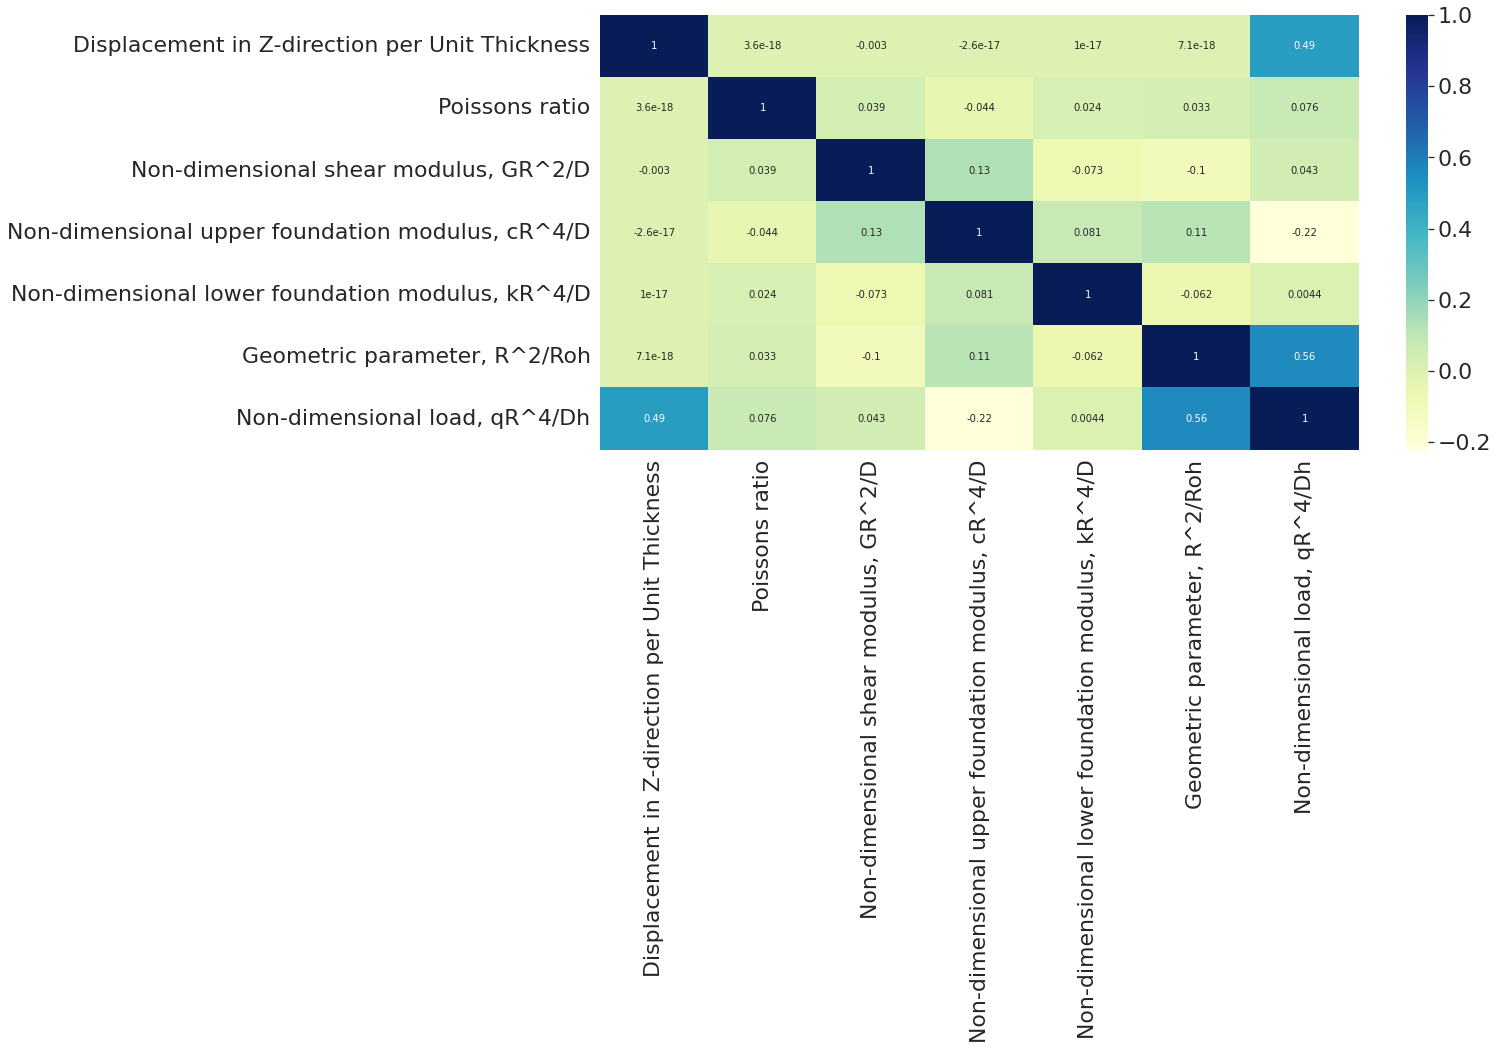

In [120]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sns.heatmap(dataSet.corr(),annot=True, cmap="YlGnBu")

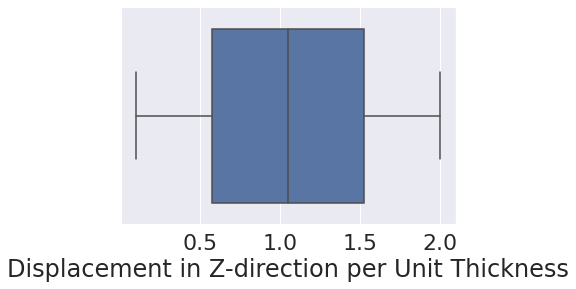

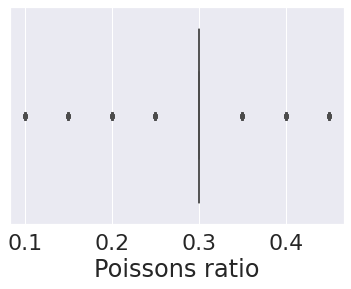

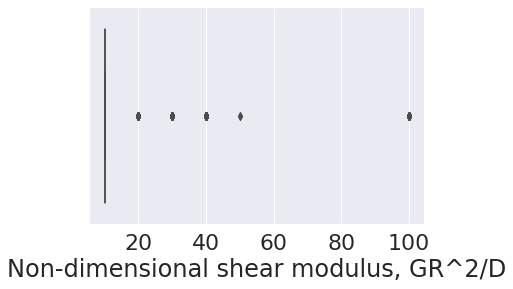

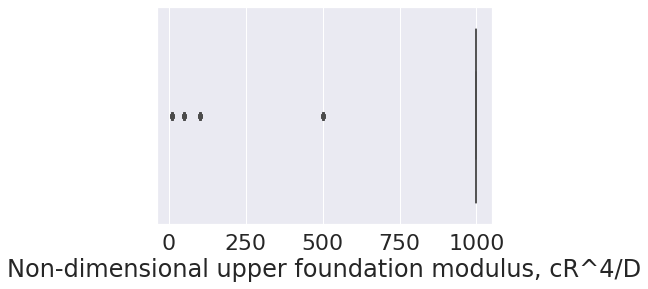

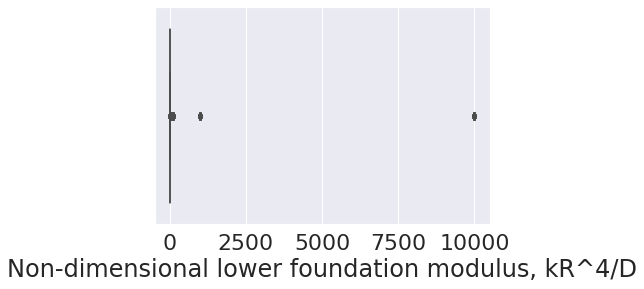

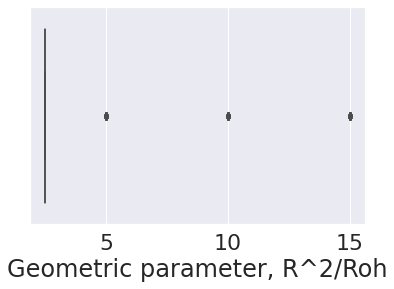

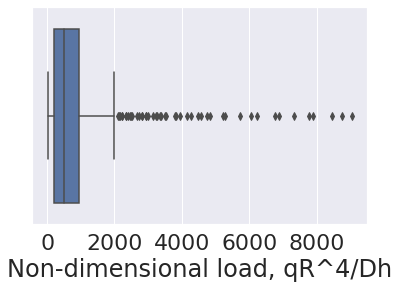

In [121]:
l=data1.columns
for i in l:
    sns.boxplot(x=dataSet[i])
    plt.show()

BOXPLOT

In [122]:
#Save Model
'''
import pickle
filename="Non-dimensional load, qR^4/Dh_random_forest_model"
savedfile=pickle.dump(model, open(filename,'wb'))'''

'\nimport pickle\nfilename="Non-dimensional load, qR^4/Dh_random_forest_model"\nsavedfile=pickle.dump(model, open(filename,\'wb\'))'

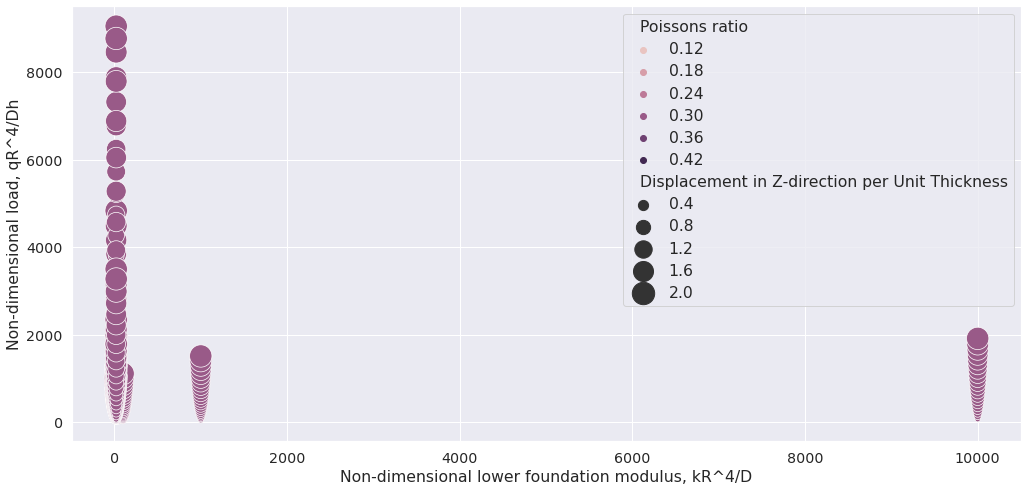

In [123]:
sns.set(font_scale=1.3)
plt.figure(figsize=[17,8])
data1.columns = ['Displacement in Z-direction per Unit Thickness','Poissons ratio','Non-dimensional shear modulus, GR^2/D', 'Non-dimensional upper foundation modulus, cR^4/D','Non-dimensional lower foundation modulus, kR^4/D','Geometric parameter, R^2/Roh','Non-dimensional load, qR^4/Dh']
sns.scatterplot(y="Non-dimensional load, qR^4/Dh", x="Non-dimensional lower foundation modulus, kR^4/D", hue="Poissons ratio",size="Displacement in Z-direction per Unit Thickness", data=dataSet, sizes=(30,500))
# I don't think this is accurate figuring and this can be made more intuitive and better.

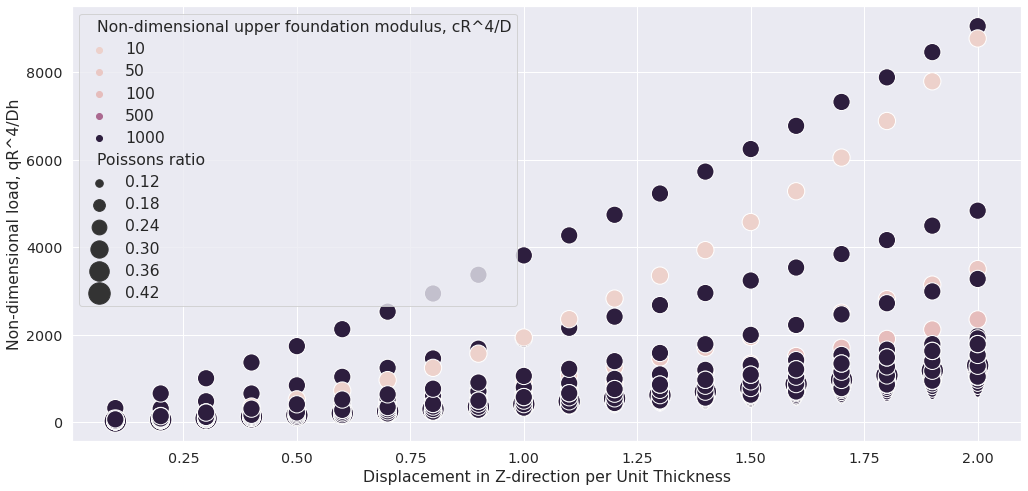

In [124]:
plt.figure(figsize=[17,8])
sns.scatterplot(y="Non-dimensional load, qR^4/Dh", x="Displacement in Z-direction per Unit Thickness", hue="Non-dimensional upper foundation modulus, cR^4/D",size="Poissons ratio", data=dataSet, sizes=(30,500))
# I don't think this is accurate figuring and this can be made more intuitive and better.

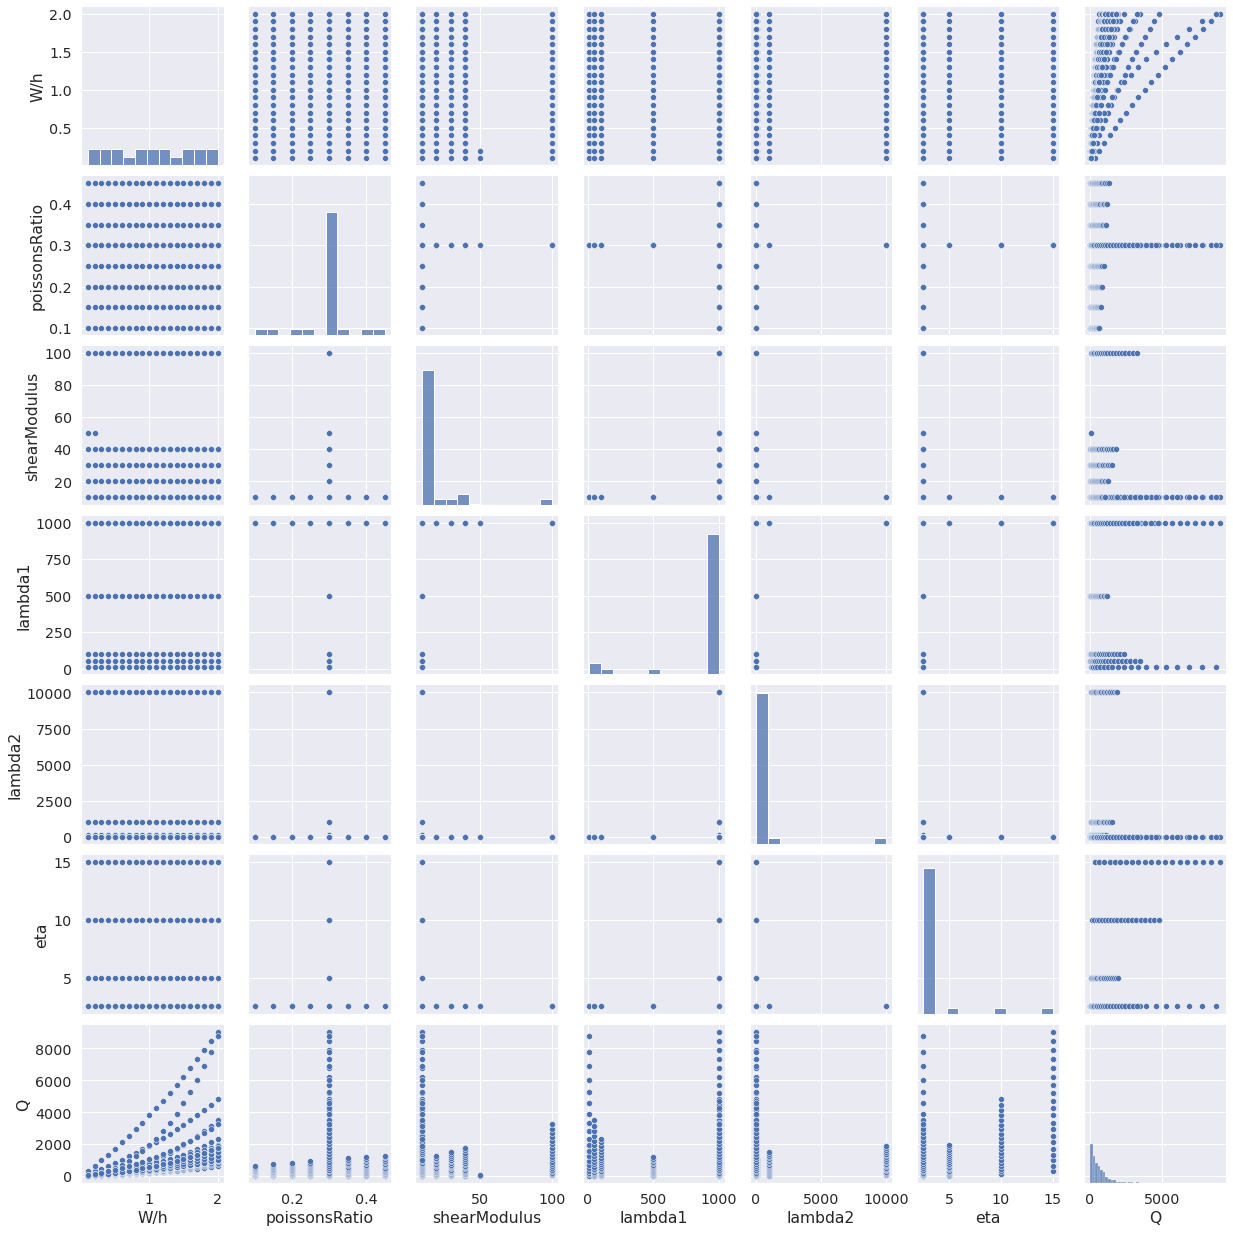

In [125]:
dataSet.columns = ['W/h','poissonsRatio','shearModulus', 'lambda1','lambda2','eta','Q']
sns.pairplot(dataSet)

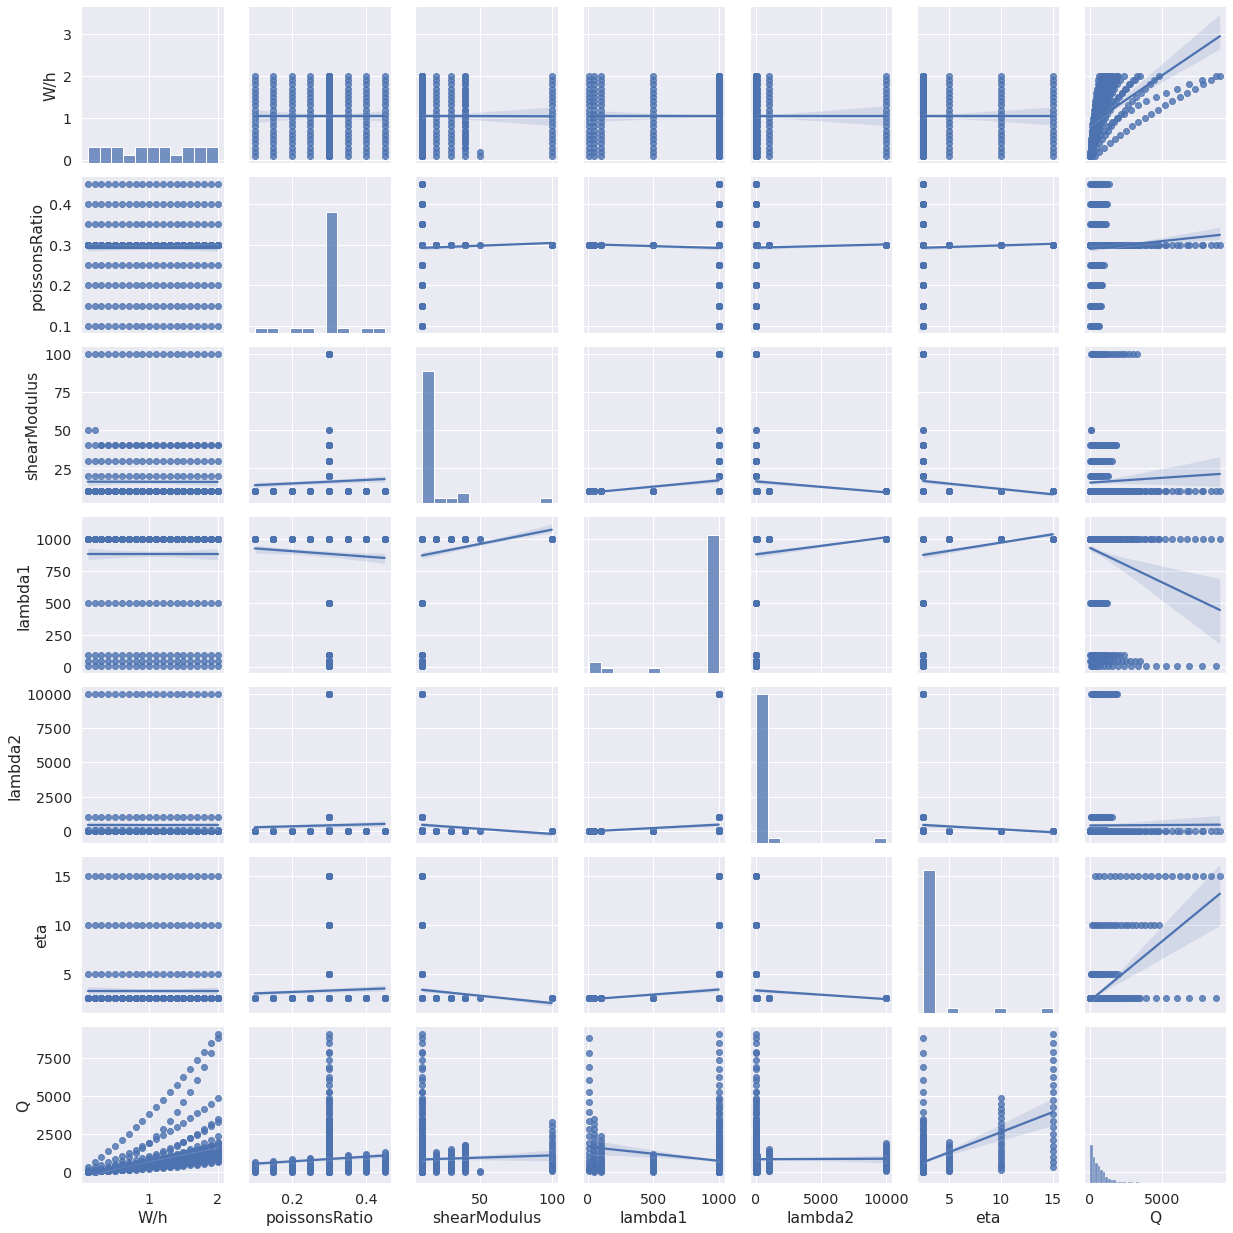

In [126]:
sns.pairplot(dataSet, kind='reg')


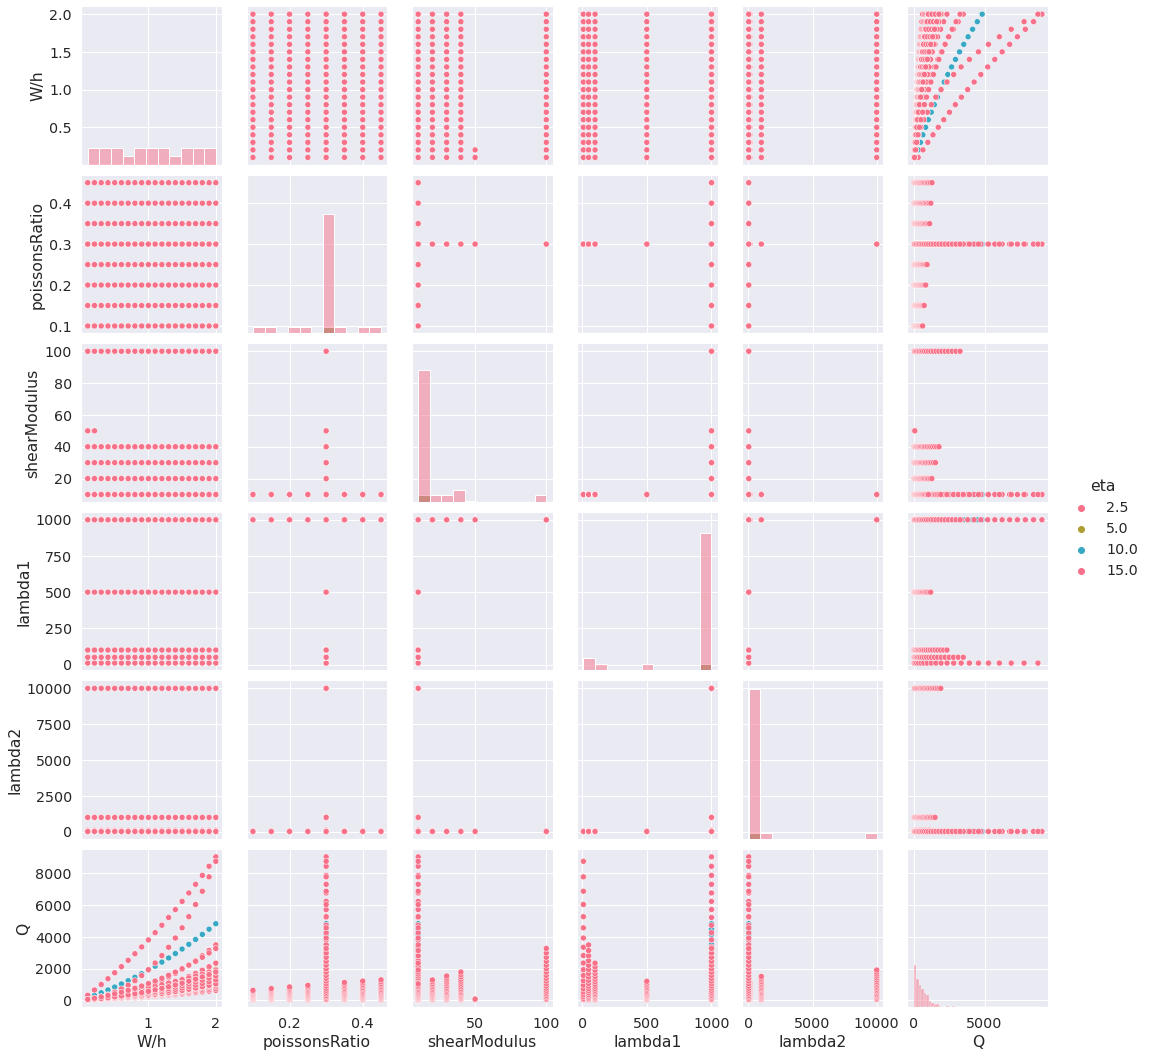

In [127]:
sns.pairplot(dataSet, hue="eta", palette="husl",diag_kind="hist")


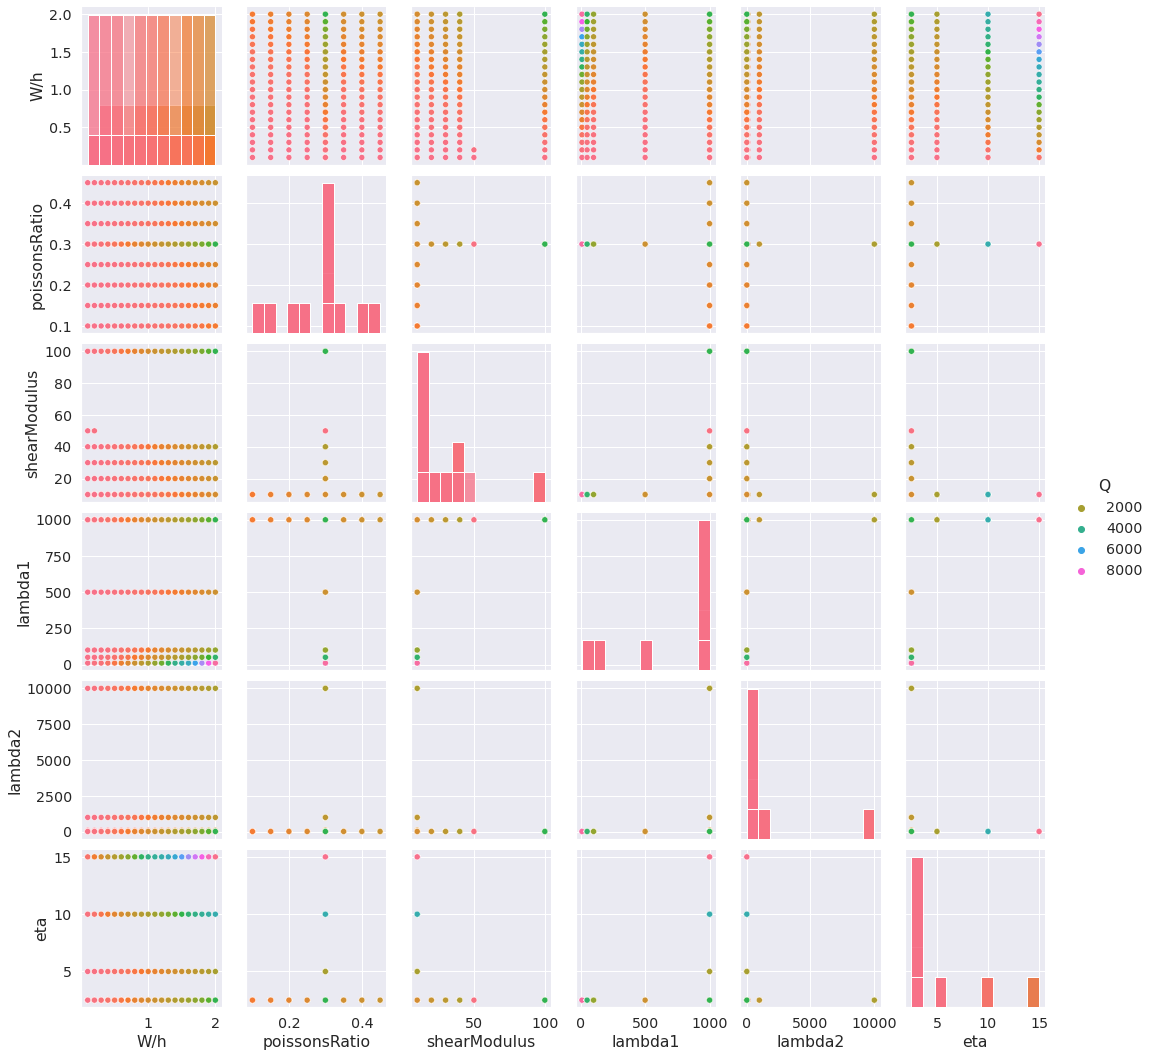

In [128]:
sns.pairplot(dataSet, hue="Q", palette="husl",diag_kind="hist")
